In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython import display

In [2]:
def actualitzar_bosc(bosc, humitat, estats):
    filas = len(bosc)
    columnas = len(bosc[0])
    
    estats_copia = estats.copy()
    
    for i in range(filas):
        for j in range(columnas):
            if estats_copia[i][j] == 1:  # Mirar si en el temps x s'esta cremant 
                for di in [-1, 0, 1]:
                    for dj in [-1, 0, 1]:
                        ni, nj = i + di, j + dj #Mirar tots els seus veins
                        if 0 <= ni < filas and 0 <= nj < columnas:
                            if humitat[ni][nj] >= 0: # Si tenen humitat resta -1 humitat si té 0 el menys 1 indica que es comença a cremar
                                humitat[ni][nj] -= 1
                                if humitat[ni][nj] == -1 and bosc[ni][nj] != 0: # Si té humitat 0 i té vegetació la casella es crema
                                    estats[ni][nj] = 1  
                            elif bosc[ni][nj] > 0 and humitat[ni][nj] == -1: # Si la humitat s'ha consumit i hi ha vegetació es crema (-1)
                                bosc[ni][nj] -= 1
                                if bosc[ni][nj] == 0: # Si ja no queda vegetació la casella s'ha cremat
                                    estats[ni][nj] = 2  
    
    return bosc, humitat, estats

In [3]:
# Lista de tonos de verde
tonos_verdes = [
    "#C8FFB4",  # Verde claro
    "#A3FF91",  # Verde claro-medio
    "#7FFF6E",  # Verde medio
    "#5BCF4F",  # Verde medio-intenso
    "#3FA33F",  # Verde intenso
    "#2E8330",  # Verde oscuro-intenso
    "#1F6420",  # Verde oscuro
    "#0F4710",  # Verde oscuro-medio
    "#002500"   # Verde muy oscuro
]

In [4]:
def visualitzar(bosc, estats):
    n = len(bosc)
    m = len(bosc[0])
    

    display.clear_output(wait=True)
    plt.figure(figsize=(8, 8))
    
    # Pintar de verd les zones de vegatació segons la seva quantitat
    cmap_custom = ListedColormap(tonos_verdes)
    
    # Establir el color marró per a les caselles sense vegatació
    cmap_custom.set_under('#8B4513')  # Marrón oscuro para las áreas no boscosas
    
    # Pintar de marró les caselles sense vegetació
    bosc_colors = np.where(bosc == 0, 0.1, bosc)
    plt.imshow(bosc_colors, cmap=cmap_custom, vmin=0.5, vmax=10)
    
    plt.colorbar().remove()
    
    plt.xticks([])
    plt.yticks([])
    
    # Respresentar l'estat de les caselles
    for i in range(n):
        for j in range(m):
            if estats[i][j] == 1: # Si la casella s'esta cremant es pinta de vermell
                plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.52), 1, 1, fill=True, color='#FF2000'))  # Color entre rojo y naranja
                
            elif estats[i][j] == 2: # Si la casella esta cremada es pinta de gris fosc
                plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.52), 1, 1, fill=True, color='#111111'))  # Color entre gris y negro
    
    
    plt.show()
    plt.pause(0.5)  



In [5]:
def incendi(bosc, humitat, estats):
    for i in range(25):
        visualitzar(bosc, estats)
        bosc, humitat, estats = actualitzar_bosc(bosc, humitat, estats)

In [6]:
def llegir_img(nom_fitxer):
    with open(nom_fitxer, 'r') as file:
        lines = file.readlines() 
    return lines

def convertir(lines, mida):
    matriu = []
    fila_actual = []
    for line in lines:
        valor = int(line.strip())
        fila_actual.append(valor) 
        if len(fila_actual) == mida:  
            matriu.append(fila_actual) 
            fila_actual = []  
    return matriu

In [7]:
noms_fitxer = ['dades_vegetacio.img', 'dades_humitat.img', 'dades_estat.img']
mida = 10

resultats = {}

for fitxer in noms_fitxer:
    lines = llegir_img(fitxer)
    matriu = convertir(lines, mida)
    
    nombre_variable = fitxer.split('_')[1].split('.')[0]
    resultats[nombre_variable] = matriu

bosc = resultats['vegetacio']
humitat = resultats['humitat']
estats = resultats['estat']


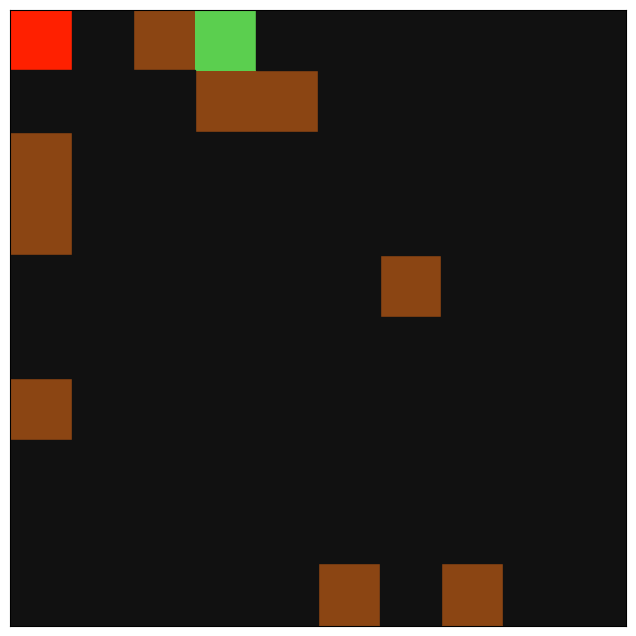

In [8]:
incendi(bosc, humitat, estats)